# Lab: Predicting type of cloth using Convolutional Neural Network (CNN)

Fashion MNIST is a drop in replacement for MNIST!

## About Fashion mnist

Fashion-MNIST is a dataset of Zalando’s article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In other words, we have 70,000 images of 28 pixels width and 28 pixels height in greyscale. Each image is showing one of 10 possible clothing types. 

Here is one:

<img src="../assets/images/fashion-mnist-2.png">

Here are some images from the dataset along with the clothing they are showing:

<img src="../assets/images/fashion-mnist-1.png">

Here are all different types of clothing:



| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


Running in Google COLAB :  False


## Step 1: Download data

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.fashion_mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  22404
train label [22404] = 5 
------------ raw data for train_image[22404] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

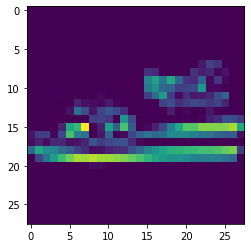

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            keras.layers.Reshape(
              target_shape=(28 * 28,), input_shape=(28, 28)
              ),
            tf.keras.layers.Dense(128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
## Model 2

# model = keras.Sequential([
#     keras.layers.Reshape(
#       target_shape=(28 * 28,), input_shape=(28, 28)
#     ),
#     keras.layers.Dense(
#       units=256, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=192, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=128, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=10, activation=tf.nn.softmax #'softmax'
#     )
# ])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),  # 'adam'
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# print (model.summary())

## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'cnn-fashion-mnist' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)

Saving TB logs to :  /tmp/tensorboard-logs/cnn-fashion-mnist/2019-09-09--21-23-53


## Step 6: Training the model


In [9]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.5140 - accuracy: 0.8200 - val_loss: 0.4267 - val_accuracy: 0.8493
Epoch 2/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.3824 - accuracy: 0.8618 - val_loss: 0.3794 - val_accuracy: 0.8638
Epoch 3/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.3453 - accuracy: 0.8746 - val_loss: 0.3546 - val_accuracy: 0.8719
Epoch 4/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.3187 - accuracy: 0.8826 - val_loss: 0.3475 - val_accuracy: 0.8730
Epoch 5/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.2997 - accuracy: 0.8898 - val_loss: 0.3376 - val_accuracy: 0.8783
Epoch 6/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.2853 - accuracy: 0.8939 - val_loss: 0.3277 - val_accuracy: 0.8815
Epoch 7/10
48000/48000 [==========

## Step 7 : See Training History

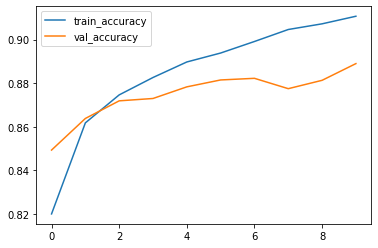

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [11]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 389 ms, sys: 41.9 ms, total: 431 ms
Wall time: 226 ms


random index =  74
test_label[74] = 2.  So the number is 2
prediction of test_image[74] = [ 0.000  0.000  0.962  0.000  0.037  0.000  0.000  0.000  0.000  0.000]
max softmax output =  0.96242654
index of max softmax output = 2.  So the prediction is same (2)


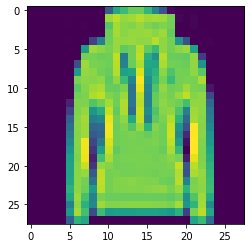

In [12]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.349
Metric : accuracy = 0.879


### 9.2 - Confusion Matrix

In [14]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.003  0.000  0.064  0.000  0.933]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [15]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  9
prediction2 1 :  2


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[814,   3,  19,  27,   3,   0, 123,   0,  11,   0],
       [  2, 969,   2,  21,   4,   0,   2,   0,   0,   0],
       [ 16,   0, 824,  10,  74,   0,  74,   0,   2,   0],
       [ 11,   5,  16, 921,  19,   0,  23,   0,   5,   0],
       [  0,   0, 143,  42, 739,   0,  73,   0,   3,   0],
       [  0,   0,   0,   1,   0, 954,   0,  27,   2,  16],
       [117,   2, 100,  31,  46,   1, 686,   0,  16,   1],
       [  0,   0,   0,   0,   0,  11,   0, 974,   0,  15],
       [  7,   0,   3,   3,   2,   2,   4,   8, 970,   1],
       [  0,   0,   0,   0,   0,   9,   1,  51,   0, 939]])

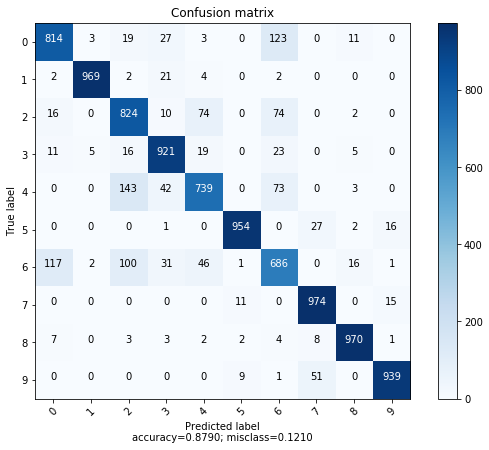

In [17]:
## Plot confusion matrix
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

import my_utils

my_utils.plot_confusion_matrix(cm, target_names=[0,1,2,3,4,5,6,7,8,9], normalize=False)

### 9.3 - Metrics Calculated from Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.8276563294356889,
       'precision': 0.8417786970010341,
       'recall': 0.814,
       'support': 1000},
 '1': {'f1-score': 0.9792824658918645,
       'precision': 0.9897854954034729,
       'recall': 0.969,
       'support': 1000},
 '2': {'f1-score': 0.7821547223540578,
       'precision': 0.7443541102077688,
       'recall': 0.824,
       'support': 1000},
 '3': {'f1-score': 0.8959143968871596,
       'precision': 0.8721590909090909,
       'recall': 0.921,
       'support': 1000},
 '4': {'f1-score': 0.7832538420773715,
       'precision': 0.8331454340473506,
       'recall': 0.739,
       'support': 1000},
 '5': {'f1-score': 0.9650986342943854,
       'precision': 0.9764585465711362,
       'recall': 0.954,
       'support': 1000},
 '6': {'f1-score': 0.6908358509566969,
       'precision': 0.6957403651115619,
       'recall': 0.686,
       'support': 1000},
 '7': {'f1-score': 0.9456310679611651,
       'precision': 0.9188679245283019,
       'recall': 0.974,
 

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?

**2 - Build a deeper neural net** 
- IN Step-4, uncomment and use 'model-2'.  This is a wider/deeper model
- Rerun the notebook again
- did the accuracy improve?
- how much the training time go up?